In [15]:
%matplotlib inline
import nltk
import numpy as np
import pandas as pd
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

ImportError: cannot import name 'KMedoids'

In [16]:
import numpy as np
import random

def cluster(distances, k=3):

    m = distances.shape[0] # number of points

    # Pick k random medoids.
    curr_medoids = np.array([-1]*k)
    while not len(np.unique(curr_medoids)) == k:
        curr_medoids = np.array([random.randint(0, m - 1) for _ in range(k)])
    old_medoids = np.array([-1]*k) # Doesn't matter what we initialize these to.
    new_medoids = np.array([-1]*k)
   
    # Until the medoids stop updating, do the following:
    while not ((old_medoids == curr_medoids).all()):
        # Assign each point to cluster with closest medoid.
        clusters = assign_points_to_clusters(curr_medoids, distances)

        # Update cluster medoids to be lowest cost point. 
        for curr_medoid in curr_medoids:
            cluster = np.where(clusters == curr_medoid)[0]
            new_medoids[curr_medoids == curr_medoid] = compute_new_medoid(cluster, distances)

        old_medoids[:] = curr_medoids[:]
        curr_medoids[:] = new_medoids[:]

    return clusters, curr_medoids

def assign_points_to_clusters(medoids, distances):
    distances_to_medoids = distances[:,medoids]
    clusters = medoids[np.argmin(distances_to_medoids, axis=1)]
    clusters[medoids] = medoids
    return clusters

def compute_new_medoid(cluster, distances):
    mask = np.ones(distances.shape)
    mask[np.ix_(cluster,cluster)] = 0.
    cluster_distances = np.ma.masked_array(data=distances, mask=mask, fill_value=10e9)
    costs = cluster_distances.sum(axis=1)
    return costs.argmin(axis=0, fill_value=10e9)

In [2]:
titles = open('news_title.txt').read().split('\n')
synopses = open('news_keyword.txt').read().split('\n')
synopses = synopses[:300]
titles = titles[:300]
print(len(titles)) # output = 100
print(len(synopses)) # output = 100

300
300


In [3]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000, max_df=0.8, min_df=0.1)
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)
print(tfidf_matrix.shape) # output = (100, 548)
terms = tfidf_vectorizer.get_feature_names()
print(terms)

(300, 16)
['가격', '강화', '관계자', '기간', '기관', '기준', '노력', '대상', '방식', '상황', '운영', '이날', '정책', '진행', '확인', '활동']


In [18]:
km = KMeans(n_clusters = 5)
km.fit(tfidf_matrix) # K-means clustering 적용
clusters = km.labels_.tolist() # 리스트화
print(clusters)
len(clusters)

[4, 4, 3, 1, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 0, 4, 2, 2, 4, 2, 2, 3, 1, 2, 2, 4, 2, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3, 3, 2, 2, 4, 3, 2, 2, 2, 2, 2, 1, 0, 2, 3, 4, 1, 1, 0, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 1, 4, 2, 4, 3, 3, 4, 1, 2, 1, 3, 2, 4, 2, 3, 2, 2, 2, 4, 3, 4, 4, 0, 3, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 4, 4, 2, 3, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 0, 3, 1, 2, 0, 2, 2, 3, 0, 2, 2, 2, 2, 4, 3, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 4, 4, 4, 4, 1, 3, 2, 2, 2, 1, 0, 3, 2, 0, 1, 1, 2, 4, 2, 3, 1, 0, 2, 2, 4, 1, 4, 2, 1, 2, 2, 2, 1, 1, 4, 3, 2, 4, 2, 0, 4, 3, 4, 2, 2, 0, 4, 0, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 3, 2, 2, 1, 3, 2, 4, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 1, 2, 1, 0, 3, 2, 0, 0, 2, 2, 3, 1, 2, 2, 4, 2, 3, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 2, 4, 2, 2, 4, 1, 1, 2, 4, 2, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 3, 2, 2, 4, 3, 0, 1, 3, 2, 2, 2, 2, 2, 4, 0, 1, 2, 3, 2, 2, 3, 3, 2, 3, 0, 2, 2, 2, 0, 0]


AttributeError: 'int' object has no attribute 'shape'

In [5]:
films = {'title': titles, 'synopsis': synopses, 'cluster': clusters}
frame = pd.DataFrame(films, index=clusters, columns=['title', 'cluster'])
frame['cluster'].value_counts() # 각 클러스터의 영화 개수 출력

4    130
3     52
2     43
1     43
0     32
Name: cluster, dtype: int64

In [11]:
titles

['뉴욕증시 연준 정책 금리 결정 강세 다우 ',
 '친환경차 122대 고속 질주 1만 ',
 '음성한우협회 시설 소고기 기탁 ',
 '밀고자 안네 프랑크 이름 요원 비난 고속열차 ',
 '임실군 노인일자리정책 농촌사회 모델로 ',
 '생생정보 택시 맛객 소곱창부대찌개 ',
 '인텔 세계 협력 시범 선언식 서비스 맞손 ',
 '부산항 장기화 유치 크루즈 성과 관광객 ',
 '국민 10명 8명 에너지 전환 의향 ',
 '크레인 원청 처벌 불가 백기 노동부 장관 ',
 '상장사 10곳 7곳 수출 순익 내수기업 ',
 '강화농산물 김장철 김장시장 2일 행위 풍물시장터 ',
 '815랩 아나운서 4000여명 주름개선 닭발 콜라겐 크림 ',
 '롯데영플라자 청주점 창립 38돌 주년 행사 축하 ',
 '세계은행 기업환경 한국 4위 역대 최고 ',
 '토요타 캠리 반응 가속 주행 만족 ',
 '상하이사회과학원 학술교류 연구협력 체결 ',
 '장애인식개선 제천시 비장애인 한마당 특강 ',
 '누적수익률 투증 6.8% 포트폴리오 ',
 '건전 문화 알참시장 주민 1000여 ',
 '웰크론헬스케어 셀미인 하이서울 우수상품 제품 ',
 '인천공항 소방대 552명 고용 정규직화 윤곽 ',
 '유웨이어플라이 대학원 온라인 원서 접수 당부 유의 ',
 '당대회 선전 정치국원 시진핑 포함 서기 ',
 '미국 5일 해제 시차 서머타임 ',
 '49개 학교 초고압 송전선로 노출 규정을 ',
 '인천 계양구 재단 여성 일자리 포럼 ',
 '넉살 파격적 누리꾼 고백 댓글 잠자리 ',
 '청년실업 경남형 기업트랙 협약 ',
 '순천향대천안병원 환자안전시스템 강화 구축 ',
 '코미 회고록 스캔들 충성 진실 풀리나 ',
 '현대리바트 사무용 회의실 테이블 신제품 출시 ',
 '이사 거래 절벽 다주택자 ',
 '관광버스 근처 엽총 창문 경찰 총알 ',
 '관광분야 공단 해외취업 협약 ',
 '사이트 두산 규모 자사주 자기주식 615억 소각 ',
 '10조 규모 혁신모험펀드 창업 조성 벤처 ',
 '

In [6]:
print("Top terms per cluster:\n\n")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("Cluster %d words:" % i, end='')
    for j in range(5):
        print(terms[order_centroids[i][j]], end=',')
    print('\n')
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print('\n')

Top terms per cluster:


Cluster 0 words:정책,강화,기준,관계자,기관,

Cluster 0 titles: 뉴욕증시 연준 정책 금리 결정 강세 다우 , 친환경차 122대 고속 질주 1만 , 임실군 노인일자리정책 농촌사회 모델로 , 국민 10명 8명 에너지 전환 의향 , 청년실업 경남형 기업트랙 협약 , 10조 규모 혁신모험펀드 창업 조성 벤처 , 전북도 서비스 후불제 검토 시행 여부 , 약발 급물살 정책 코스닥 장밋빛 전망 , 북핵 위협 연단 고위층 경악 미국 , 금융위 내년 공인회계사 최소 850명 선발 , 가계통신비 논의 조충현 사단법인 이동통신 협회 , 기재부 소비 반등 경기 훈풍 흐름 , 덴티움 고성장 예상 임플란트 시장 성장세 진입 , 네덜란드 리포터 개척 장애인 마을 , 의원 생명윤리 법률 개정 대표발의 , 북핵 포기 반중국 태평양 동맹 , 한반도 금융위기 중국 보호무역 일대일로 전략적 , 조세소위 케어 중복지원 의료비 논란 , 선호 지역 강남 다주택 무주택자 적어 , 고군산군 새만금 태양광발전 투자 에너지 유치 저장장치 , 고형폐기물 자원화 논의 에너지 , 세종공업 시대 수소차 센서 부품 독점 공급 , 회장 액티브펀드 해외주식형펀드 시대 비과세 , 수차례 주거복지로드맵 서민 지원 , 4차 산업혁명 드론 전문가 조언 , 미국 워싱턴 중국 경사론 걱정 , 개혁 금융위원장 압박 보호 , 창원시 특화형 2022년 노인일자리 창출 , 한반도 태평양 전략 일대일 박병수 , 성인영화배우 마크롱 포르노 대화 , 진중권 마음 바른정당 정치권 통합 연애편지 논평 , 몽양 지혜 합작 민주주의 보수 정치연합 필수 ,

Cluster 1 words:이날,진행,관계자,기관,상황,

Cluster 1 titles: 장애인식개선 제천시 비장애인 한마당 특강 , 건전 문화 알참시장 주민 1000여 , 인천 계양구 재단 여성 일자리 포럼 , 관광분야 공단 해외취업 협약 , 창업박람회 선순환 창업자 창업특별시 투자자 서울 생태계 , 김정남 살해 포함 

In [7]:
#set up colors per clusters using a dict
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}

#set up cluster names using a dict
cluster_names = {0: 'News1',
                 1: 'News2',
                 2: 'Car, Drive, Train',
                 3: 'Family, Home, Brother',
                 4: 'Marry, Woman, Friend'}

In [8]:
dist = 1 - cosine_similarity(tfidf_matrix) # distance equation
mds = MDS(n_components=2, dissimilarity = 'precomputed')
Z = mds.fit_transform(dist) # 2차원으로 축소
xs, ys = Z[:, 0], Z[:, 1] # 시각화를 위해 저장해둔

In [9]:
df = pd.DataFrame(dict(x = xs, y = ys, label=clusters, title=titles))
groups = df.groupby('label') 

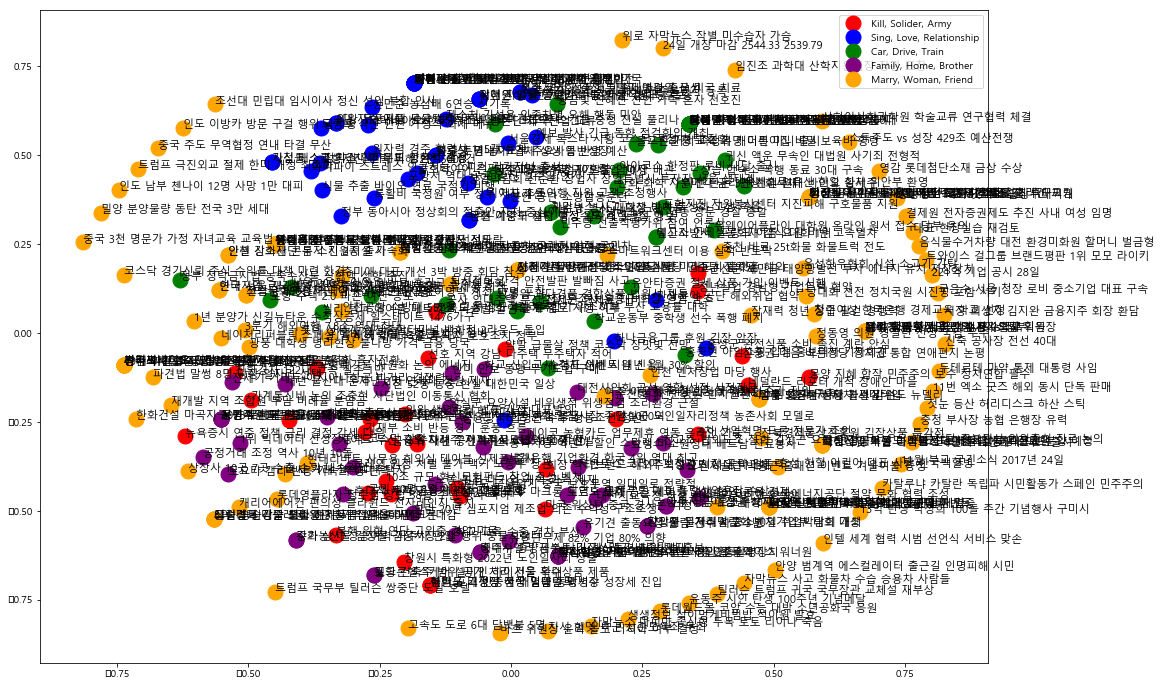

In [13]:
fig, ax = plt.subplots(figsize=(17, 12)) # set size

for idx, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=15, label=cluster_names[idx], color=cluster_colors[idx])
    
ax.legend(numpoints=1) #show legend with only 1 point
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size = 11)
plt.show()